In [1]:
import numpy as np
import matplotlib.pyplot as plt
import model
import plot_tools
import clock_work_axion
import reheating
import transport_equation
from common import constants, cosmology

In [2]:
Gamma_phi = 1e7
H_inf = 2e10
mR = 6
m_phi = 100 * 1e-9 # [GeV]
eps = clock_work_axion.calc_eps(mR)
f = 1e12
f_eff = clock_work_axion.calc_f_eff(f, eps)
t0, initial = reheating.calc_initial_reheating(H_inf)
tf = t0*1e7
M = m_phi / eps
params = (mR, M)
T_osc = (90 * constants.M_pl**2 * m_phi**2 / (constants.g_star * np.pi**2))**(1/4)

In [3]:
%time T_fn, H_fn, T_dot_fn, final = reheating.solve_reheating_eq(t0, tf, initial, Gamma_phi)

CPU times: user 5.17 ms, sys: 4.13 ms, total: 9.3 ms
Wall time: 28.5 ms


In [4]:
m = model.AxionBaryogenesisModel(
    source_vector=transport_equation.source_vector_weak_sphaleron, 
    get_axion_source=clock_work_axion.get_axion_source_clockwork,
    axion_rhs=clock_work_axion.rhs_log_t,
    calc_axion_mass=clock_work_axion.calc_mass,
    axion_parameter=(eps, M),
    axion_initial=(clock_work_axion.theta_to_phi_over_f(1.0, eps), 0),
    Gamma_phi=Gamma_phi,
    H_inf=H_inf,
)

/home/jana/Documents/master-project/transport_eq_in_time/clock_work_axion.py:60: RuntimeWarning: overflow encountered in exp
  t = np.exp(log_t)
/home/jana/Documents/master-project/transport_eq_in_time/plot_tools.py:29: RuntimeWarning: invalid value encountered in true_divide
  y = theta_dot / T / source_scale


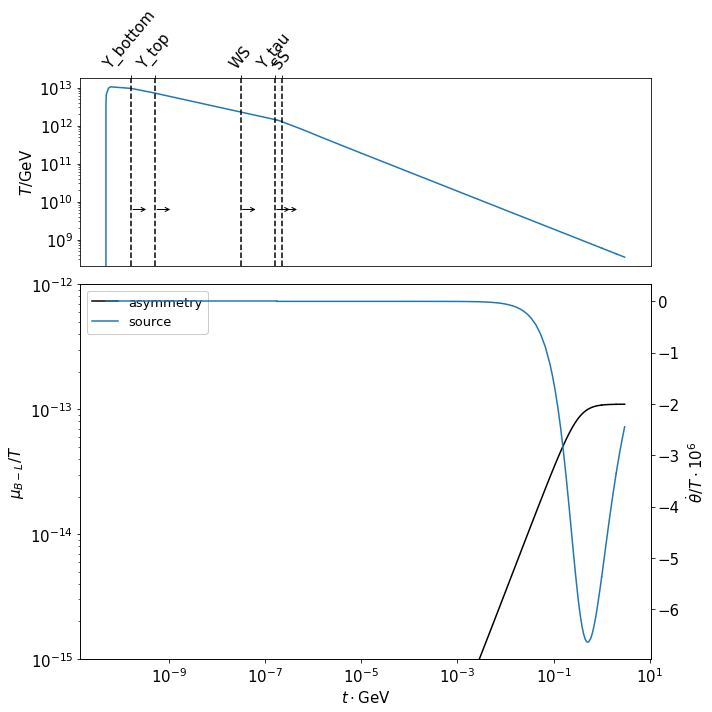

In [5]:
res = model.solve(m, collect=True)
plot_tools.plot(res, asymmetry_limits=(1e-15, 1e-12), source_scale=1e-9)

In [6]:
_B_minus_L_red_chem, T_final, axion_final = model.solve(m)

/home/jana/Documents/master-project/transport_eq_in_time/clock_work_axion.py:60: RuntimeWarning: overflow encountered in exp
  t = np.exp(log_t)


In [7]:
t_final = cosmology.switch_hubble_and_time_rad_dom(cosmology.calc_hubble_parameter(cosmology.calc_radiation_energy_density(T_final)))

change: 3.615338591436212 Y: 0.38235966970947743 convergence_eps: 0.01
change: 0.0008908666910200613 Y: 0.3820193414028962 convergence_eps: 0.01


10.48195294289279

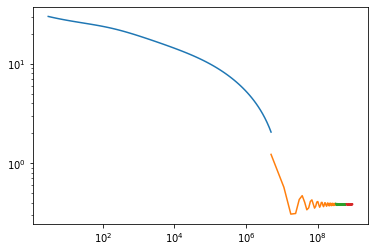

In [8]:
clock_work_axion.compute_relic_density(axion_final, T_final, t_final, f, mR, M, debug=True)

In [9]:
t_osc = cosmology.switch_hubble_and_time_rad_dom(cosmology.calc_hubble_parameter(cosmology.calc_entropy_density(T_osc)))

In [10]:
"%e %e" % (t_final, t_osc)

'3.000000e+00 2.236517e+09'

Text(0, 0.5, 'V_eff / GeV^4')

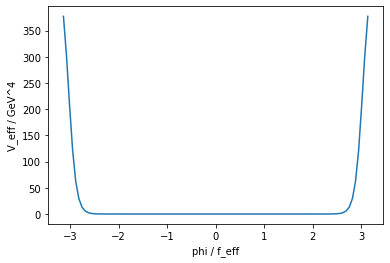

In [11]:
theta_range = np.linspace(-np.pi, np.pi, 100)
phi_over_f_range = f_eff * theta_range / f # not a linear map
plt.plot(theta_range, clock_work_axion.calc_V_eff_over_f_sq(phi_over_f_range, eps, M))
plt.xlabel("phi / f_eff")
plt.ylabel("V_eff / GeV^4")

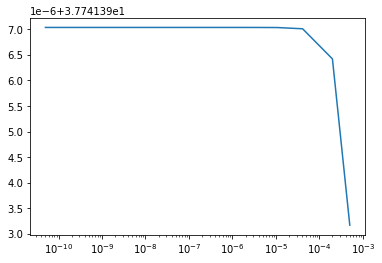

In [12]:
T_fn_rad_dom, H_fn_rad_dom = cosmology.make_rad_dom_H_fn(tf, T_fn(tf))
sol_sbg = clock_work_axion.evolve(t0, tf, (clock_work_axion.theta_to_phi_over_f(1.0, eps), 0), (eps, M, H_fn))
plt.semilogx(sol_sbg.t, sol_sbg.y[0])

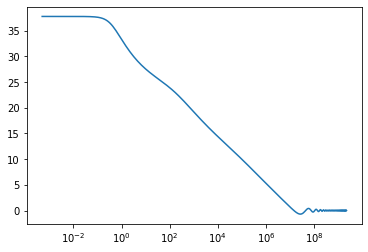

In [13]:
sol_relic = clock_work_axion.evolve(tf, t_osc, sol_sbg.y[:, -1], (eps, M, H_fn_rad_dom))
plt.semilogx(sol_relic.t, sol_relic.y[0])

Text(0, 0.5, 'Y')

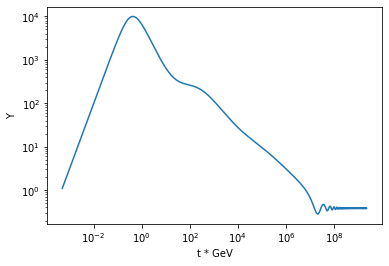

In [14]:
Y = clock_work_axion.calc_abundance(*sol_relic.y, T_fn_rad_dom(sol_relic.t), eps, mR, f, M)
plt.loglog(sol_relic.t, Y)
plt.xlabel("t * GeV")
plt.ylabel("Y")

In [15]:
clock_work_axion.compute_relic_density(sol_sbg.y[:, -1], T_fn(sol_sbg.t[-1]), sol_sbg.t[-1], f, mR, M)

10.480557651408814

In [16]:
N = 10
m_phi_range = np.geomspace(1e-5, 1e5, N) * 1e-9 # [GeV]
mR_range = np.linspace(0, 15, N)[1:]
f_eff = 1e13 # GeV

In [17]:
H_inf = 1e8
Gamma_phi = H_inf
%time obs = np.array([[clock_work_axion.compute_observables(m_phi, mR, f_eff, Gamma_phi, H_inf, relic_kwargs=dict(max_steps=100)) for m_phi in m_phi_range] for mR in mR_range])

/home/jana/Documents/master-project/transport_eq_in_time/clock_work_axion.py:60: RuntimeWarning: overflow encountered in exp
  t = np.exp(log_t)
/home/jana/Documents/master-project/transport_eq_in_time/reheating.py:35: RuntimeWarning: overflow encountered in exp
  _, rho_tot = np.exp(sol.sol(np.log(t)))
/home/jana/Documents/master-project/transport_eq_in_time/clock_work_axion.py:62: RuntimeWarning: overflow encountered in double_scalars
  return phi_dot_over_f * t, phi_dot_dot_over_f * t
/home/jana/Documents/master-project/transport_eq_in_time/clock_work_axion.py:49: RuntimeWarning: overflow encountered in double_scalars
  return 4 * M**2 * calc_du_dphi_times_f(phi_over_f, eps) / (u**3 * (1 + 1 / u**2)**2)


Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
Required step size is less than spacing between numbers.
CPU times: user 52.1 s, sys: 1.47 ms, total: 52.1 s
Wall time: 52.1 s


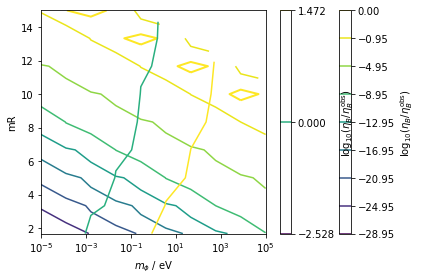

In [21]:
A = np.log10(obs[:, :, 0] / constants.eta_B_observed)
level = np.sort(np.concatenate([[0], np.arange(np.nanmin(A), np.nanmax(A), 4)]))
C1 = plt.contour(m_phi_range * 1e9, mR_range, A, levels=level, cmap="viridis")
C1.collections[np.where(C1.levels == 0)[0][0]].set_color("black")
C1.collections[np.where(C1.levels == 0)[0][0]].set_linewidths(2)
plt.colorbar().set_label(r"$\log_{10} ( \eta_B / \eta_B^{\mathrm{obs}})$")

B = np.log10(obs[:, :, 1] / constants.Omega_DM_h_sq)
level = np.sort(np.concatenate([[0], np.arange(np.nanmin(B), np.nanmax(B), 4)]))
C2 = plt.contour(m_phi_range * 1e9, mR_range, B, levels=level) # , cmap="plasma")
#C2.collections[np.where(C2.levels == 0)[0][0]].set_linewidths(5)
#C2.collections[np.where(C2.levels == 0)[0][0]].set_color("black")
plt.colorbar().set_label(r"$\log_{10} ( \eta_B / \eta_B^{\mathrm{obs}})$")

plt.xlabel("$m_\phi$ / eV")
plt.ylabel("mR")
plt.xscale("log")
plt.tight_layout()

<ipython-input-22-0b44cc883396>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(m_phi_range * 1e9, mR_range, np.log(obs[:,:,0]))


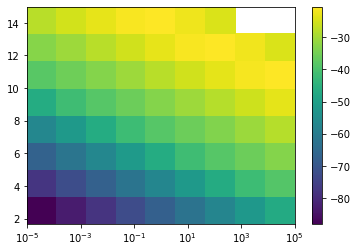

In [22]:
plt.pcolormesh(m_phi_range * 1e9, mR_range, np.log(obs[:,:,0]))
plt.xscale("log")
plt.colorbar()

<ipython-input-23-fe36f1c2c64e>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(m_phi_range * 1e9, mR_range, np.log(obs[:,:,1]))


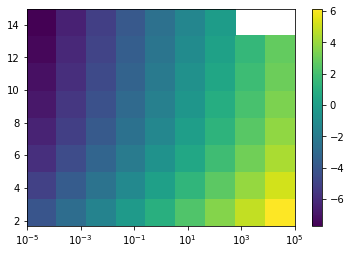

In [23]:
plt.pcolormesh(m_phi_range * 1e9, mR_range, np.log(obs[:,:,1]))
plt.xscale("log")
plt.colorbar()